In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

## Reading the Washington D.C Property Dataset

In [4]:
data       = pd.read_csv("DC_Properties.csv")

## 1). Inspecting the data to find out:
 - Total number of observations
 - Total number of variables (columns)
 - The number of numerical and none-numerical variables
 - The number of variables (columns) that include missing values
 
 #### One way to find out the number of observations/variables (columns) and the variables types is to use DataFrame.info()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          28900 non-null  int64  
 1   BATHRM              28900 non-null  int64  
 2   HF_BATHRM           28900 non-null  int64  
 3   HEAT                28900 non-null  object 
 4   AC                  28900 non-null  object 
 5   NUM_UNITS           28900 non-null  int64  
 6   ROOMS               28900 non-null  int64  
 7   BEDRM               28900 non-null  int64  
 8   AYB                 28900 non-null  int64  
 9   YR_RMDL             28900 non-null  int64  
 10  EYB                 28900 non-null  int64  
 11  STORIES             28900 non-null  float64
 12  SALEDATE            28900 non-null  object 
 13  PRICE               28891 non-null  float64
 14  QUALIFIED           28900 non-null  object 
 15  SALE_NUM            28900 non-null  int64  
 16  GBA 

#### Also, we can use pandas.api.types.is_numeric_dtype to count the number of numerical and none-numerical variables 

In [31]:
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]): n+=1
print('numerical variables:', n, 'none-numerical variables:',len(data.columns)-n)


numerical variables: 25 none-numerical variables: 22


 - Total number of observations: **28900**
 - Total number of variables (columns): **47**
 - The number of numerical variables: **25**
 - The number none-numerical variables: **22**

To find the variables having missing values and the number of rows including missing values, we use ***isnull*** and then ***sum*** as following:

In [32]:
data.isnull().sum()

Unnamed: 0            0
BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 9
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK    

 - We have the variable, **PRICE**,  that includes **9** rows with missing values

## 2). Preparing data for analytics
- **Handling missing values**
- **Removing the properties that have abnormal price**
- **Removing all columns that have a constant value**
- **Replacing the column SALEDATE with the columns, SALEYEAR and SALEMONTH**
- **Transform the values of sale price, PRICE, into values represented in thousands**

### Handling missing values
The data has only 9 records that include missing values. Therefore, we can remove them without losing  a lot of information. After removing these records, our data will include **28891** records

In [33]:
data.dropna(inplace=True)
data['PRICE'].isnull().sum()

np.int64(0)

### Removing the properties that have abnormal price
First, we can have a look at the distribution of the properties price. The distribution of the sale price plotted below tell us that the majority of the properties in our data have a sale price that is less than \$1,250,000. However, it does not show us the abnnomal prices.


<Axes: ylabel='Frequency'>

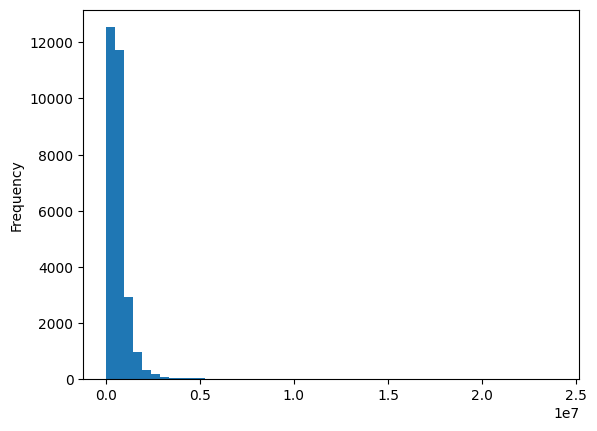

In [34]:
data['PRICE'].plot(kind='hist',bins=50)

We can expect very expensive properties that because some properties are buildings with multiple units. However,  properties with very low prices deserve our attention. We remove the properties associated with exterime (price<\$10,000):
- Sorting the prices and display the lowest ones to see whether there are abnormal prices (very low prices)
- Plotting the number of rooms, full bed rooms, and bath rooms for the properties costing less than \$10,000
- Removing these properties

In [35]:
data['PRICE'].sort_values(ascending=True).head(5)

28896      1.0
8174      10.0
24198    250.0
17882    250.0
14323    250.0
Name: PRICE, dtype: float64

<Axes: xlabel='PRICE'>

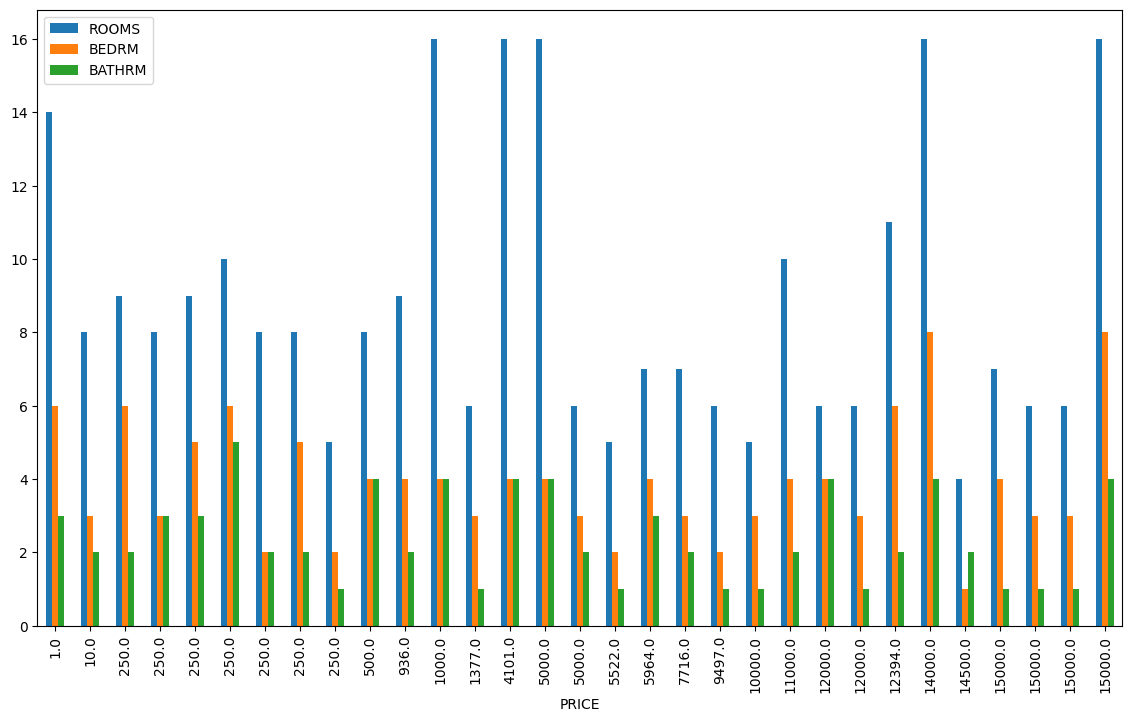

In [36]:
data[data['PRICE']<=15000].sort_values(['PRICE'],ascending=True).plot.bar(figsize=(14,8), x='PRICE', y=['ROOMS', 'BEDRM','BATHRM'])

In [37]:
# We remove the properties with exterime low prices (price <10,000)
data=data[data['PRICE']>10000]
data.shape

(28870, 47)

### Removing all columns that have a constant value

In [38]:
constant_columns = []
for c in data.columns:
    n = len(data[c].unique())
    if n==1:constant_columns.append(c)
print('Constant Columns:', constant_columns)
data.drop(columns= constant_columns, axis=1, inplace=True)
print(data.shape)

Constant Columns: ['GIS_LAST_MOD_DTTM', 'SOURCE', 'CITY', 'STATE']
(28870, 43)


### Replacing the column SALEDATE with the columns, SALEYEAR and SALEMONTH

In [39]:
dateObject = pd.DatetimeIndex(data['SALEDATE'])
data['SALEYEAR'] = dateObject.year
data['SALEMONTH'] = dateObject.month
data[['SALEDATE', 'SALEYEAR', 'SALEMONTH']].head()    

,SALEDATE,SALEYEAR,SALEMONTH
0,11/25/2003,2003,11
1,6/21/2016,2016,6
2,7/12/2006,2006,7
3,9/29/2011,2011,9
4,5/3/2018,2018,5


In [40]:
data.drop(columns=['SALEDATE'], axis=1, inplace=True)
data.shape

(28870, 44)

### Transform the values of sale price, PRICE, into values represented in thousands

In [41]:
data[['PRICE']]=data[['PRICE']]/1000

## 3). Use visualization for data analysis
- 3.1. Show the trend of average sale-price over years
- 3.2. Show the average sale-price over the months
- 3.3. Show the number of properties that have been sold over months
- 3.4. Show the average/sum of sale price for all 4 quadrant in Washington D.C.
- 3.5. Show the number of properties that have been sold in each of the 4 quandrant
- 3.6. Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015
- 3.7. Show the average sale-price for each of the property grades
- 3.8. Is there any relation between neighborhood and sale price?

### 3.1. Show the trend of average sale-price over years
According to the figure below, the average sale price keeps increasing over years

<Axes: title={'center': 'Average Sale Price over Years'}, xlabel='Sale Year', ylabel='Average Sale Price in Thousand'>

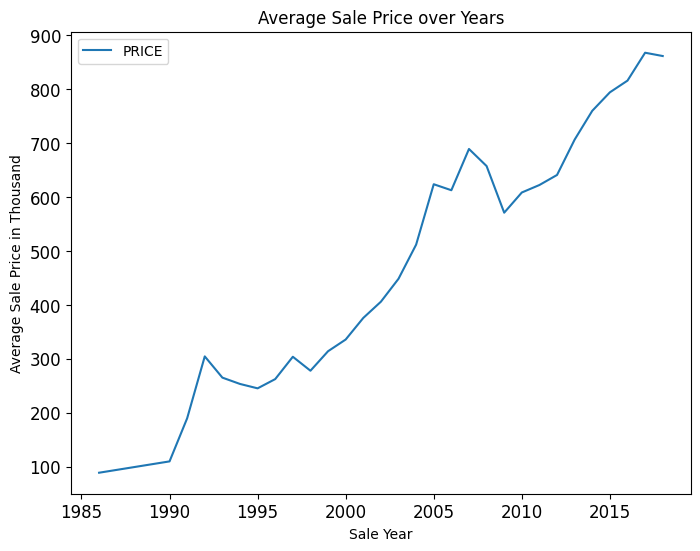

In [42]:
data[['SALEYEAR', 'PRICE']].groupby('SALEYEAR').mean().plot(figsize=(8,6),y= 'PRICE', fontsize=12, xlabel='Sale Year', ylabel='Average Sale Price in Thousand'
                                                           ,title='Average Sale Price over Years')

### 3.2. Show the average sale-price over the months
According to the figure below, June and Juli have the highest sale price average, while Janurary, March, and September have the lowest sale price average

<Axes: title={'center': 'Average Sale Price over Months'}, xlabel='Sale Month', ylabel='Average Sale Price in Thousand'>

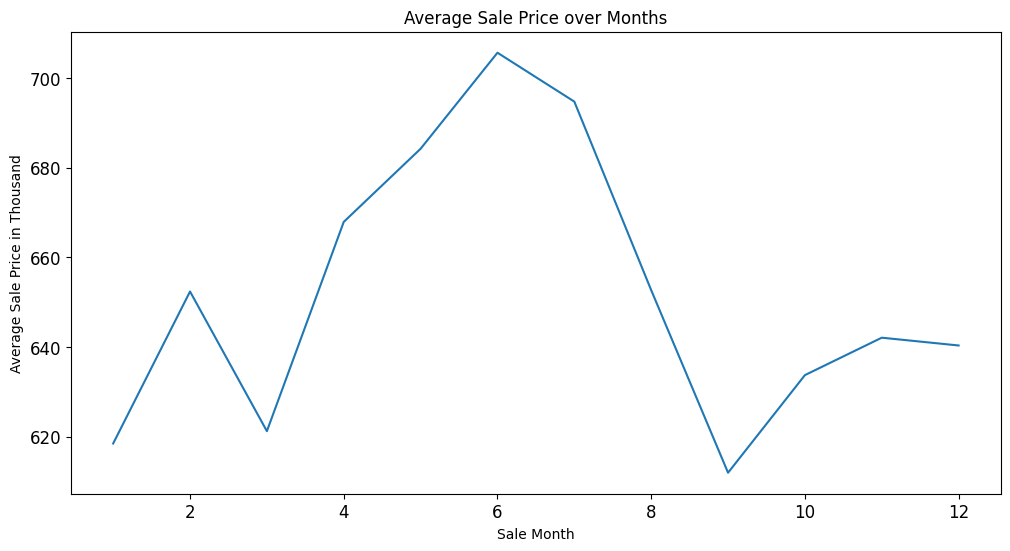

In [43]:
data[['SALEMONTH', 'PRICE']].groupby('SALEMONTH').mean().plot(figsize=(12,6),y= 'PRICE', fontsize=12, xlabel='Sale Month', ylabel='Average Sale Price in Thousand'
                                                           ,legend=False, title='Average Sale Price over Months')

### 3.3.	Show the number of properties that have been sold over months
According to the figure below, the lowest number of sold properties is Feburary and highest one is in June. 

<Axes: title={'center': 'Number of Sold Properties over Months'}, xlabel='Sale Month', ylabel='Number of Sold Properties'>

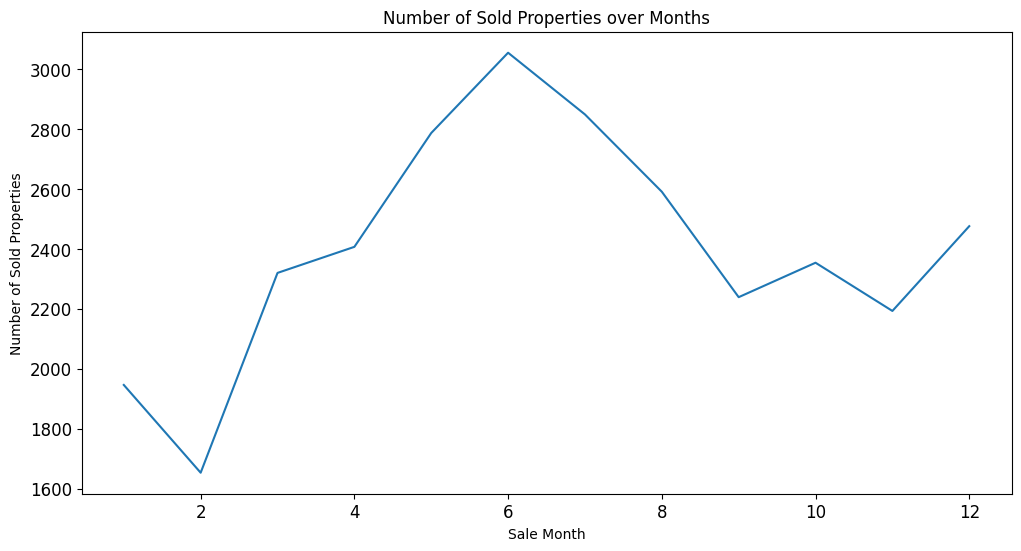

In [44]:
data[['SALEMONTH', 'PRICE']].groupby('SALEMONTH').count().plot(figsize=(12,6),y= 'PRICE', fontsize=12, xlabel='Sale Month', ylabel='Number of Sold Properties'
                                                           ,legend=False, title='Number of Sold Properties over Months')

### 3.4. Show the average/sum of sale price for all 4 quadrant in Washington D.C.
According to the figure below, the northwest region has the highest sale price,  and southwest region has the lowest sale price

<Axes: title={'center': 'Average Sale Price in the 4 Quadrant'}, xlabel='Quadrant', ylabel='Average Sale Price'>

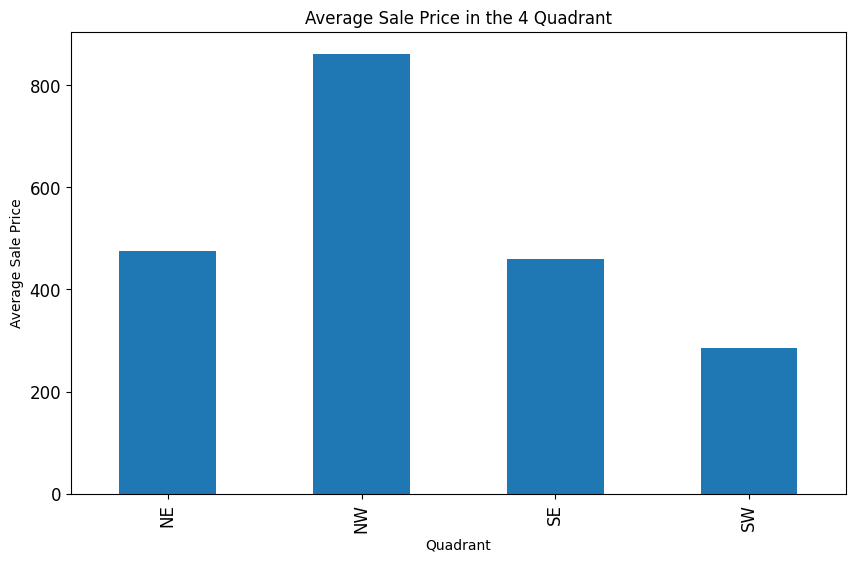

In [45]:
data[['QUADRANT', 'PRICE']].groupby('QUADRANT').mean().plot.bar(figsize=(10,6),y= 'PRICE', fontsize=12, xlabel='Quadrant', ylabel='Average Sale Price'
                                                           ,legend=False, title='Average Sale Price in the 4 Quadrant')

### 3.5.	Show the number of properties that have been sold in each of the 4 quandrant
The figure below shows the same pattern we saw with the sale price averages. The northwest region has the highest sale and southwest region has the lowest sale.

<Axes: title={'center': 'Number of Sold  Properties in the 4 regions'}, xlabel='Region', ylabel='Number of Sold  Properties'>

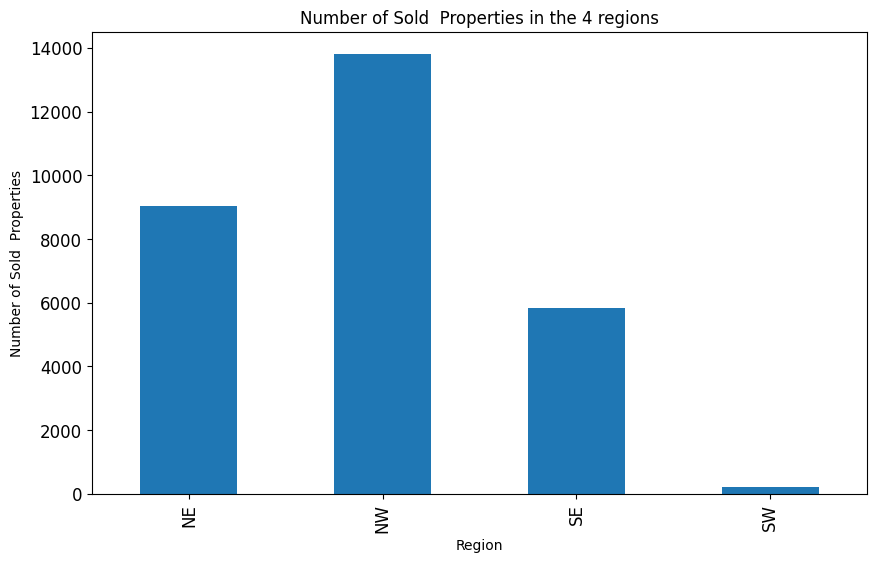

In [46]:
data[['QUADRANT', 'PRICE']].groupby('QUADRANT').count().plot.bar(figsize=(10,6),y= 'PRICE', fontsize=12, xlabel='Region', ylabel='Number of Sold  Properties'
                                                           ,legend=False, title='Number of Sold  Properties in the 4 regions')


### 3.6. Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold after 2015

<Axes: title={'center': 'Average Sale Price for Properties with Different Number of Rooms'}, xlabel='Number of Fireplaces', ylabel='Average Sale Price (Thousands)'>

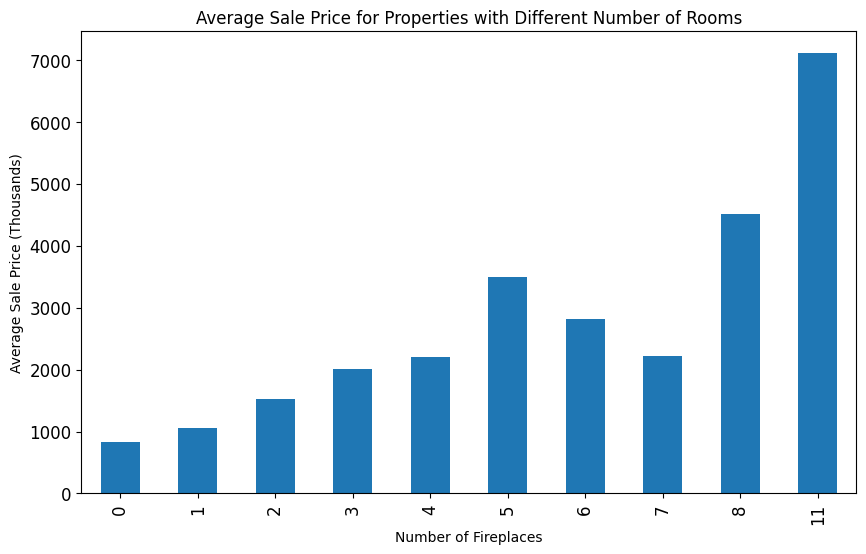

In [47]:
filter1 =data['QUADRANT']=='NW'
filter2 =data['SALEYEAR']>2015 
result = data[filter1 & filter2]
result[['FIREPLACES', 'PRICE']].groupby('FIREPLACES').mean().plot.bar(figsize=(10,6),y= 'PRICE', fontsize=12, xlabel='Number of Fireplaces', ylabel='Average Sale Price (Thousands)'
                                                           ,legend=False, title='Average Sale Price for Properties with Different Number of Rooms')


### 3.7. Show the average sale-price for each of the property grades

<Axes: title={'center': 'Average Sale Price over Property Grades'}, xlabel='Property Grade', ylabel='Average Sale Price (Thousands)'>

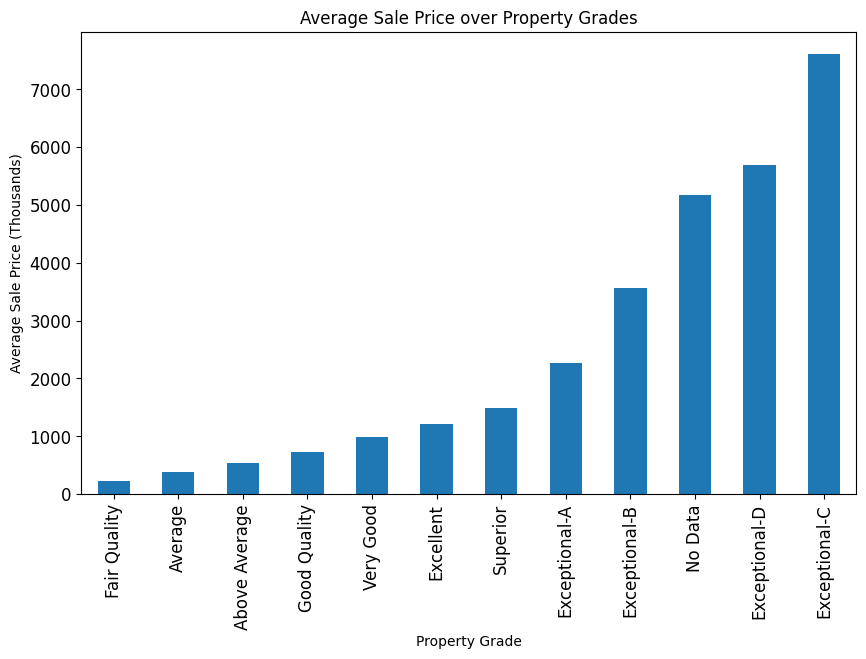

In [48]:
data[['GRADE', 'PRICE']].groupby('GRADE').mean().sort_values(by=['PRICE']).plot.bar(figsize=(10,6),y= 'PRICE', fontsize=12, xlabel='Property Grade', ylabel='Average Sale Price (Thousands)'
                                                           ,legend=False, title='Average Sale Price over Property Grades')

 ### 3.8. Is there any relation between neighborhood and sale price?

<Axes: title={'center': 'Average Sale Price over Property Grades'}, xlabel='Property Grade', ylabel='Average Sale Price (Thousands)'>

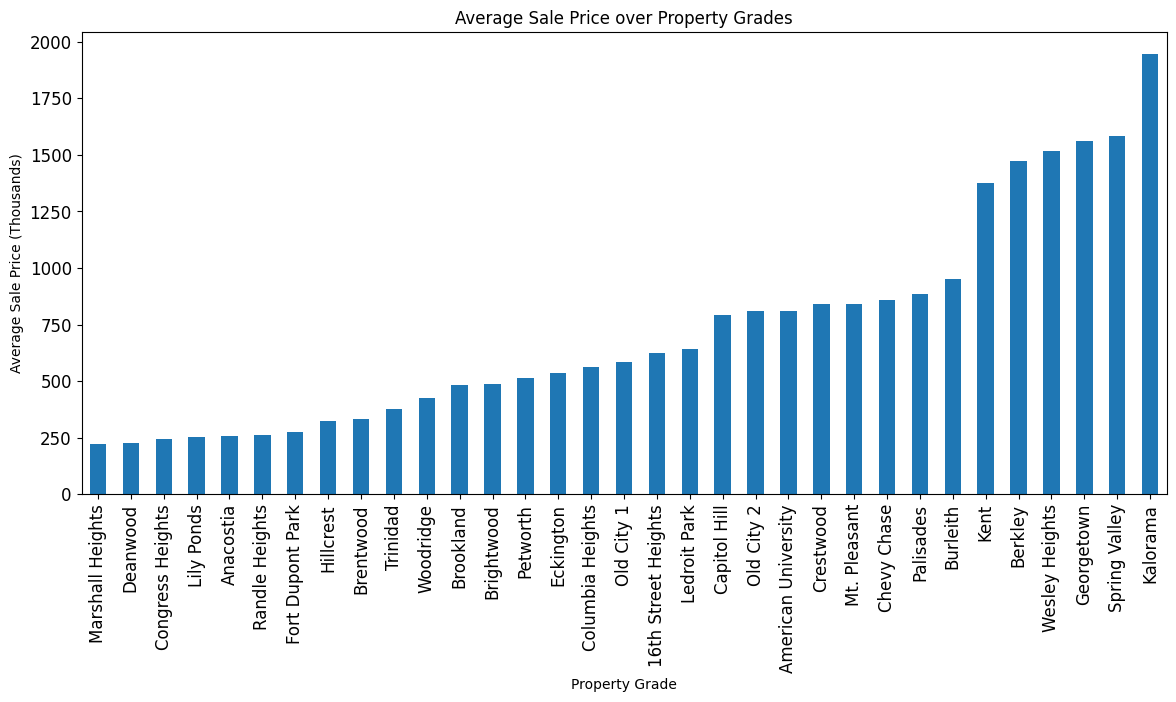

In [49]:
data[['ASSESSMENT_NBHD', 'PRICE']].groupby('ASSESSMENT_NBHD').mean().sort_values(by=['PRICE']).plot.bar(figsize=(14,6),y= 'PRICE', fontsize=12, xlabel='Property Grade', ylabel='Average Sale Price (Thousands)'
                                                           ,legend=False, title='Average Sale Price over Property Grades')

## 4). Query the data to answer the following questions
- 4.1.	Find the zip-code that has the highest and lowest number of sales
- 4.2.	Find the quadrant that has the highest and lowest average sale price
- 4.3.	Find the zip-code and its quadrant for the highest and lowest average sale-price
- 4.4.  Show the price, zip-code, quadrant, the number of stories, structural grade, and property condition for the most expensive property

### 4.1.	Find the zip-code that has the highest and lowest number of sales

In [50]:
r = data[['ZIPCODE',  'PRICE']].groupby(['ZIPCODE']).count()

print('The  Zip Code with the lowest sale:', r.idxmin(), ' Sold properties', r.min())
print('The  Zip Code with the highest sale:', r.idxmax(), ' Sold properties', r.max())

The  Zip Code with the lowest sale: PRICE    20036
dtype: int64  Sold properties PRICE    35
dtype: int64
The  Zip Code with the highest sale: PRICE    20002
dtype: int64  Sold properties PRICE    5699
dtype: int64


### 4.2. Find the quadrant that has the highest and lowest average sale price

In [51]:
r = data[['QUADRANT',  'PRICE']].groupby(['QUADRANT']).mean()

print('The quadrant with the lowest sale:', r.idxmin()[0], ' Sold properties',  round(r.min()[0]*1000))
print('The quadrant with the highest sale:',  r.idxmax()[0], ' Sold properties', round(r.max()[0]*1000))

The quadrant with the lowest sale: SW  Sold properties 284262
The quadrant with the highest sale: NW  Sold properties 861031


C:\Users\shash\AppData\Local\Temp\ipykernel_19032\1729374454.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The quadrant with the lowest sale:', r.idxmin()[0], ' Sold properties',  round(r.min()[0]*1000))
C:\Users\shash\AppData\Local\Temp\ipykernel_19032\1729374454.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('The quadrant with the highest sale:',  r.idxmax()[0], ' Sold properties', round(r.max()[0]*1000))


### 4.3.	Find the Zip-Code and its Quadrant for the highest and lowest average sale price

In [52]:
r = data[['ZIPCODE', 'QUADRANT',  'PRICE']].groupby(['ZIPCODE', 'QUADRANT']).mean()
#lPrice, lZip, lQuadrant = round(r.iloc[0]['PRICE']*1000), r.iloc[0]['ZIPCODE'], r.iloc[0]['QUADRANT']
#hPrice, hZip, hQuadrant = round(r.iloc[-1]['PRICE']*1000), r.iloc[-1]['ZIPCODE'], r.iloc[-1]['QUADRANT']
#print('The lowest average sale price:', f'{lPrice:,}', ' associated with the Zip Code', lZip, ' and existing in the Quadrant', lQuadrant)
#print('The Highest average sale price:', f'{hPrice:,}', ' associated with the Zip Code', hZip, ' and existing in the Quadrant', hQuadrant)

r.idxmin()

PRICE    (20019, NE)
dtype: object

### 4.4. Show the price, zip-code, quadrant, the number of stories, structural grade, and property condition for the  most expensive property

In [53]:
r = data.loc[data['PRICE'].idxmax()]
print('Price: ', f"{r['PRICE']*1000:,}", '\nZip-code:', r['ZIPCODE'],  '\nQuadrant:', r['QUADRANT'], '\nNumber of stories:', r['STORIES'],  '\nStructural grade:', r['GRADE'], '\nProperty condition:', r['CNDTN'])


Price:  23,960,287.0 
Zip-code: 20007 
Quadrant: NW 
Number of stories: 2.75 
Structural grade: Exceptional-C 
Property condition: Very Good


# Additional Questions (Added)

## 5). Data Exploration and Summary
- 5.1.	What is the mean and median sale price of properties? (5 pts)
- 5.2.	How many properties have more than 2 bathrooms? (5 pts)
- 5.3.  Idenzztify the number of unique ZIP codes in the dataset. (5 pts)

In [76]:
# 1. Mean and Median Sale Price
mean_price = data['PRICE'].mean()
median_price = data['PRICE'].median()

print("Mean Sale Price:", mean_price)
print("Median Sale Price:", median_price)

Mean Sale Price: 655.319075510911
Median Sale Price: 548.55


In [77]:
# 2. Properties with more than 2 bathrooms
bathroom_count = len(data[data['BATHRM'] > 2])
print("Properties with more than 2 bathrooms:", bathroom_count)

Properties with more than 2 bathrooms: 11564


In [84]:
# 3. Unique ZIP codes
unique_zip_codes = data['ZIPCODE'].nunique()
print("Unique ZIP codes:", unique_zip_codes)

Unique ZIP codes: 19


## Q6: Advanced Data Exploration
- 6.1. Find the property with the highest sale price. (5 pts)
- 6.2. What is the average number of bedrooms in the dataset? (5 pts)
- 6.3. Identify the top 3 ZIP codes with the highest average sale price. (5 pts)

In [82]:
# 6.1. Property with the highest sale price
highest_price_property = data.loc[data['PRICE'].idxmax()]
print("Property with the highest sale price:\n", highest_price_property)

Property with the highest sale price:
 Unnamed: 0                          8922
BATHRM                                 7
HF_BATHRM                              3
HEAT                             Ht Pump
AC                                     Y
NUM_UNITS                              2
ROOMS                                 31
BEDRM                                 12
AYB                                 1805
YR_RMDL                             2004
EYB                                 2000
STORIES                             2.75
PRICE                          23960.287
QUALIFIED                              U
SALE_NUM                               1
GBA                                14966
BLDG_NUM                               1
STYLE                            3 Story
STRUCT                           Row End
GRADE                      Exceptional-C
CNDTN                          Very Good
EXTWALL                     Common Brick
ROOF                               Slate
INTWALL           

In [83]:
# 6.2. Average number of bedrooms
avg_bedrooms = data['BEDRM'].mean()
print("Average number of bedrooms:", avg_bedrooms)

Average number of bedrooms: 3.4820574991340494


In [85]:
# 6.3. Top 3 ZIP codes with the highest average sale price
top_zip_codes = data.groupby('ZIPCODE')['PRICE'].mean().sort_values(ascending=False).head(3)
print("Top 3 ZIP codes with the highest average sale price:\n", top_zip_codes)

Top 3 ZIP codes with the highest average sale price:
 ZIPCODE
20008    2229.28368
20007    1438.67142
20036    1315.65000
Name: PRICE, dtype: float64
